https://blog.csdn.net/qq_27825451/article/details/94436488

In [32]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1.轮廓系数
# 对于不正确的 clustering （聚类），分数为 -1 ， highly dense clustering （高密度聚类）为 +1 。
# 零点附近的分数表示 overlapping clusters （重叠的聚类）。
# silhouette_score()计算所有点的平均轮廓系数，而silhouette_samples()返回每个点的轮廓系数。
from sklearn.metrics.cluster import silhouette_score, silhouette_samples
# 2.CH分数,结果越大,评估越好
from sklearn.metrics.cluster import calinski_harabasz_score
# 3.戴维森堡丁指数 值最小是0，值越小，代表聚类效果越好
from sklearn.metrics.cluster import davies_bouldin_score
# 4.需要label_ture,结果在0~1之间,越接近1越好
# 返回 homogeneity, completeness, v_measure(Harmonic mean of the first two)
from sklearn.metrics.cluster import homogeneity_completeness_v_measure

import matplotlib.pyplot as plt

# make_blobs
param:
- n_samples: 表示数据样本点个数,默认值100
- n_features: 是每个样本的特征（或属性）数，也表示数据的维度，默认值是2
- centers: 表示类别数（标签的种类数），默认值3
- cluster_std: 表示每个类别的方差，例如我们希望生成2类数据，其中一类比另一类具有更大的方差，可以将cluster_std设置为[1.0,3.0]，浮点数或者浮点数序列，默认值1.0
- center_box: 中心确定之后的数据边界，默认值(-10.0, 10.0)
- shuffle: 将数据进行洗乱，默认值是True
- random_state: 随机生成器的种子
- return_centers: 是否返回中心

return:
- X: ndarray of shape (n_samples, n_features)
    The generated samples.
- y: ndarray of shape (n_samples,)
    The integer labels for cluster membership of each sample.
- centers: ndarray of shape (n_centers, n_features)
    The centers of each cluster. Only returned if return_centers=True.



https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

# 创建数据集

In [33]:
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本4个特征，共4个簇，
# 簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2, 0.2]

x, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=[[-1, -1], [0, 0], [1, 1], [2, 2]],
                  cluster_std=[0.4, 0.2, 0.2, 0.2],
                  random_state=9
                  )

## 展示数据

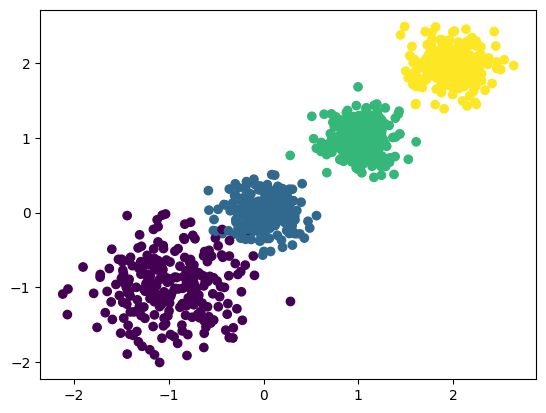

In [34]:
plt.scatter(x[:, 0], x[:, 1], c=y)

# KMeans

## n_clusters=2

In [35]:
kmeans_2 = KMeans(n_clusters=2, random_state=0)

In [36]:
y_pred_2 = kmeans_2.fit_predict(x)

d:\Miniconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 评估

In [37]:
# -1~+1,+1最好
silhouette_score(x, y_pred_2)

0.6435178953651656

In [28]:
# 分数越大越好
calinski_harabasz_score(x, y_pred_2)

3116.1706763322227

In [40]:
# 越小越好,最小为0
davies_bouldin_score(x, y_pred_2)

0.5358874086174359

In [43]:
homogeneity_completeness_v_measure(y, y_pred_2)

(0.5, 1.0, 0.6666666666666666)

### 画图展示

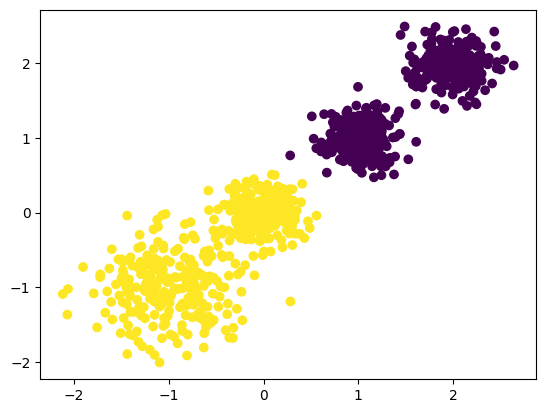

In [18]:
plt.scatter(x[:, 0], x[:, 1], c=y_pred_2)

## n_clusters=3

In [21]:
kmeans_3 = KMeans(n_clusters=3, random_state=0)

In [22]:
y_pred_3 = kmeans_3.fit_predict(x)

d:\Miniconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 评估

In [38]:
# -1~+1,+1最好
silhouette_score(x, y_pred_3)

0.5763040407094536

In [29]:
# 分数越大越好
calinski_harabasz_score(x, y_pred_3)

2931.6250301995556

In [41]:
# 越小越好,最小为0
davies_bouldin_score(x, y_pred_3)

0.519409233482674

In [44]:
homogeneity_completeness_v_measure(y, y_pred_3)

(0.6906746920125557, 0.918421687875233, 0.788430853912074)

### 画图展示

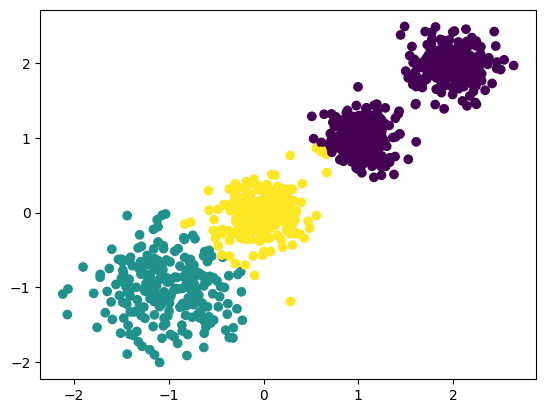

In [23]:
plt.scatter(x[:, 0], x[:, 1], c=y_pred_3)

## n_clusters=4

In [24]:
kmeans_4 = KMeans(n_clusters=4, random_state=0)

In [25]:
y_pred_4 = kmeans_4.fit_predict(x)

d:\Miniconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 评估

In [39]:
# -1~+1,+1最好
silhouette_score(x, y_pred_4)

0.6634549555891298

In [30]:
# 分数越大越好
calinski_harabasz_score(x, y_pred_4)

5924.050613480169

In [42]:
# 越小越好,最小为0
davies_bouldin_score(x, y_pred_4)

0.45378434388768746

In [45]:
homogeneity_completeness_v_measure(y, y_pred_4)

(0.9504666591966088, 0.9514586793986006, 0.9509624105850092)

### 画图展示

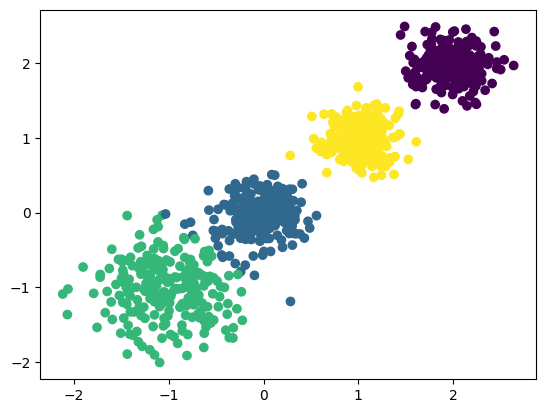

In [26]:
plt.scatter(x[:, 0], x[:, 1], c=y_pred_4)